In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
patients = pd.read_csv('patients.csv')
treatments = pd.read_csv('treatments.csv')
adverse_reactions = pd.read_csv('adverse_reactions.csv')

In [3]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


`patients` columns:
- **patient_id**: the unique identifier for each patient in the [Master Patient Index](https://en.wikipedia.org/wiki/Enterprise_master_patient_index) (i.e. patient database) of the pharmaceutical company that is producing Auralin
- **assigned_sex**: the assigned sex of each patient at birth (male or female)
- **given_name**: the given name (i.e. first name) of each patient
- **surname**: the surname (i.e. last name) of each patient
- **address**: the main address for each patient
- **city**: the corresponding city for the main address of each patient
- **state**: the corresponding state for the main address of each patient
- **zip_code**: the corresponding zip code for the main address of each patient
- **country**: the corresponding country for the main address of each patient (all United states for this clinical trial)
- **contact**: phone number and email information for each patient
- **birthdate**: the date of birth of each patient (month/day/year). The [inclusion criteria](https://en.wikipedia.org/wiki/Inclusion_and_exclusion_criteria) for this clinical trial is  age >= 18 *(there is no maximum age because diabetes is a [growing problem](http://www.diabetes.co.uk/diabetes-and-the-elderly.html) among the elderly population)*
- **weight**: the weight of each patient in pounds (lbs)
- **height**: the height of each patient in inches (in)
- **bmi**: the Body Mass Index (BMI) of each patient. BMI is a simple calculation using a person's height and weight. The formula is BMI = kg/m<sup>2</sup> where kg is a person's weight in kilograms and m<sup>2</sup> is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. *The [inclusion criteria](https://en.wikipedia.org/wiki/Inclusion_and_exclusion_criteria) for this clinical trial is 16 >= BMI >= 38.*

In [4]:
treatments.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


350 patients participated in this clinical trial. None of the patients were using Novodra (a popular injectable insulin) or Auralin (the oral insulin being researched) as their primary source of insulin before.  All were experiencing elevated HbA1c levels.

All 350 patients were treated with Novodra to establish a baseline HbA1c level and insulin dose. After four weeks, which isn’t enough time to capture all the change in HbA1c that can be attributed by the switch to Auralin or Novodra:
- 175 patients switched to Auralin for 24 weeks
- 175 patients continued using Novodra for 24 weeks

`treatments` columns:
- **given_name**: the given name of each patient in the Master Patient Index that took part in the clinical trial
- **surname**: the surname of each patient in the Master Patient Index that took part in the clinical trial
- **auralin**: the baseline median daily dose of insulin from the week prior to switching to Auralin (the number before the dash) *and* the ending median daily dose of insulin at the end of the 24 weeks of treatment measured over the 24th week of treatment (the number after the dash). Both are measured in units (shortform 'u'), which is the [international unit](https://en.wikipedia.org/wiki/International_unit) of measurement and the standard measurement for insulin.
- **novodra**: same as above, except for patients that continued treatment with Novodra
- **hba1c_start**: the patient's HbA1c level at the beginning of the first week of treatment. HbA1c stands for Hemoglobin A1c. The [HbA1c test](https://depts.washington.edu/uwcoe/healthtopics/diabetes.html) measures what the average blood sugar has been over the past three months. It is thus a powerful way to get an overall sense of how well diabetes has been controlled. Everyone with diabetes should have this test 2 to 4 times per year. Measured in %.
- **hba1c_end**: the patient's HbA1c level at the end of the last week of treatment
- **hba1c_change**: the change in the patient's HbA1c level from the start of treatment to the end, i.e., `hba1c_start` - `hba1c_end`. For Auralin to be deemed effective, it must be "noninferior" to Novodra, the current standard for insulin. This "noninferiority" is statistically defined as the upper bound of the 95% confidence interval being less than 0.4% for the difference between the mean HbA1c changes for Novodra and Auralin (i.e. Novodra minus Auralin).

In [5]:
adverse_reactions.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


`adverse_reactions` columns:
- **given_name**: the given name of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- **surname**: the surname of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- **adverse_reaction**: the adverse reaction reported by the patient

Additional useful information:
- [Insulin resistance varies person to person](http://www.tudiabetes.org/forum/t/how-much-insulin-is-too-much-on-a-daily-basis/9804/5), which is why both starting median daily dose and ending median daily dose are required, i.e., to calculate change in dose.
- It is important to test drugs and medical products in the people they are meant to help. People of different age, race, sex, and ethnic group must be included in clinical trials. This [diversity](https://www.clinicalleader.com/doc/an-fda-perspective-on-patient-diversity-in-clinical-trials-0001) is reflected in the `patients` table.
- Ensuring column names are descriptive enough is an important step in acquainting yourself with the data. 'Descriptive enough' is subjective. Ideally you want short column names (so they are easier to type and read in code form) but also fully descriptive. Length vs. descriptiveness is a tradeoff and common debate (a [similar debate](https://softwareengineering.stackexchange.com/questions/176582/is-there-an-excuse-for-short-variable-names) exists for variable names). The *auralin* and *novodra* column names are probably not descriptive enough, but you'll address that later so don't worry about that for now.

# Cleaning treatment

### Combination of all treatment information

In [6]:
treatments_cut = pd.read_csv("treatments_cut.csv")

In [7]:
treatments = pd.concat([treatments,treatments_cut],ignore_index=True) 
#ignore index clears all indeces and creates new ones starting from zero

In [8]:
treatments.shape[0]

350

In [9]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
given_name      350 non-null object
surname         350 non-null object
auralin         350 non-null object
novodra         350 non-null object
hba1c_start     350 non-null float64
hba1c_end       350 non-null float64
hba1c_change    213 non-null float64
dtypes: float64(3), object(4)
memory usage: 19.3+ KB


### HbA1c column has errors, it needs to be recalculated

In [10]:
treatments["hba1c_change_new"] = treatments["hba1c_start"] - treatments["hba1c_end"]
treatments.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change,hba1c_change_new
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN,0.43
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97,0.47
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN,0.43
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32,0.32


In [11]:
(treatments["hba1c_change_new"] != treatments["hba1c_change"]).sum() 
#number of differences between new and old hba1c change columns

348

In [12]:
treatments = treatments.drop(columns=["hba1c_change"])
treatments.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change_new
0,veronika,jindrová,41u - 48u,-,7.63,7.20,0.43
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.47
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,0.43
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


### Dosage columns fix

In [13]:
print(treatments.shape[0])
treatments = pd.melt(treatments,id_vars=["given_name","surname","hba1c_start","hba1c_end","hba1c_change_new"],
        var_name="insulin_brand",value_name="dosage")
print(treatments.shape[0])
treatments.head()

350
700


,given_name,surname,hba1c_start,hba1c_end,hba1c_change_new,insulin_brand,dosage
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
1,elliot,richardson,7.56,7.09,0.47,auralin,-
2,yukitaka,takenaka,7.68,7.25,0.43,auralin,-
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
4,alissa,montez,7.78,7.46,0.32,auralin,-


In [14]:
print((treatments["dosage"]=="-").sum()) #should be 350
mask = treatments["dosage"]=="-"
treatments = treatments[~mask].copy()

350


In [15]:
print(treatments.shape[0])
treatments.head()

350


,given_name,surname,hba1c_start,hba1c_end,hba1c_change_new,insulin_brand,dosage
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u - 36u


In [16]:
temp = treatments["dosage"].str.split("-",expand=True)
treatments["initial_dosage"] = temp.loc[:,0].copy()
treatments["final_dosage"] = temp.loc[:,1].copy()
treatments = treatments.drop(columns=["dosage"])
treatments.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change_new,insulin_brand,initial_dosage,final_dosage
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u


### Dosage columns need to be converted to integers

In [17]:
treatments["initial_dosage"] = treatments["initial_dosage"].apply(lambda x : x.split("u")[0])
treatments["final_dosage"] = treatments["final_dosage"].apply(lambda x : x.split("u")[0])

In [18]:
treatments.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change_new,insulin_brand,initial_dosage,final_dosage
0,veronika,jindrová,7.63,7.20,0.43,auralin,41,48
3,skye,gormanston,7.97,7.62,0.35,auralin,33,36
6,sophia,haugen,7.65,7.27,0.38,auralin,37,42
7,eddie,archer,7.89,7.55,0.34,auralin,31,38
9,asia,woźniak,7.76,7.37,0.39,auralin,30,36


In [19]:
treatments["initial_dosage"] = treatments["initial_dosage"].astype("float32")
treatments["final_dosage"] = treatments["final_dosage"].astype("float32")
treatments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 698
Data columns (total 8 columns):
given_name          350 non-null object
surname             350 non-null object
hba1c_start         350 non-null float64
hba1c_end           350 non-null float64
hba1c_change_new    350 non-null float64
insulin_brand       350 non-null object
initial_dosage      350 non-null float32
final_dosage        350 non-null float32
dtypes: float32(2), float64(3), object(3)
memory usage: 21.9+ KB


# Cleaning adverse reactions

In [20]:
adverse_reactions.info() #no need for cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
given_name          34 non-null object
surname             34 non-null object
adverse_reaction    34 non-null object
dtypes: object(3)
memory usage: 944.0+ bytes


# Merging dataframes

In [21]:
combined = treatments.merge(right=adverse_reactions,how="left",left_on=["given_name","surname"],right_on=["given_name","surname"])
combined.head(10)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change_new,insulin_brand,initial_dosage,final_dosage,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41.0,48.0,NaN
1,skye,gormanston,7.97,7.62,0.35,auralin,33.0,36.0,NaN
2,sophia,haugen,7.65,7.27,0.38,auralin,37.0,42.0,NaN
3,eddie,archer,7.89,7.55,0.34,auralin,31.0,38.0,NaN
4,asia,woźniak,7.76,7.37,0.39,auralin,30.0,36.0,NaN
5,joseph,day,7.70,7.19,0.51,auralin,29.0,36.0,hypoglycemia
6,roxanne,andreyeva,9.54,9.14,0.40,auralin,29.0,38.0,NaN
7,simone,baumgaertner,7.74,7.30,0.44,auralin,27.0,37.0,NaN
8,enco,žibrik,7.78,7.34,0.44,auralin,55.0,68.0,NaN
9,camilla,zaitseva,7.53,7.13,0.40,auralin,28.0,37.0,NaN


In [22]:
# We replace NaN with none, since they weren't any adverse effects on the rest patients
combined["adverse_reaction"] = combined["adverse_reaction"].replace(np.nan,"None")

In [23]:
combined.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change_new,insulin_brand,initial_dosage,final_dosage,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41.0,48.0,None
1,skye,gormanston,7.97,7.62,0.35,auralin,33.0,36.0,None
2,sophia,haugen,7.65,7.27,0.38,auralin,37.0,42.0,None
3,eddie,archer,7.89,7.55,0.34,auralin,31.0,38.0,None
4,asia,woźniak,7.76,7.37,0.39,auralin,30.0,36.0,None


### Duplicate removal

In [24]:
mask = combined.loc[:,["given_name","surname"]].duplicated(keep=False)
combined[mask]

,given_name,surname,hba1c_start,hba1c_end,hba1c_change_new,insulin_brand,initial_dosage,final_dosage,adverse_reaction
5,joseph,day,7.7,7.19,0.51,auralin,29.0,36.0,hypoglycemia
62,joseph,day,7.7,7.19,0.51,auralin,29.0,36.0,hypoglycemia


In [25]:
combined = combined.drop_duplicates(subset=["given_name","surname"])

In [26]:
combined = combined.reset_index(drop=True)
combined.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change_new,insulin_brand,initial_dosage,final_dosage,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41.0,48.0,None
1,skye,gormanston,7.97,7.62,0.35,auralin,33.0,36.0,None
2,sophia,haugen,7.65,7.27,0.38,auralin,37.0,42.0,None
3,eddie,archer,7.89,7.55,0.34,auralin,31.0,38.0,None
4,asia,woźniak,7.76,7.37,0.39,auralin,30.0,36.0,None


# Cleaning patients info

In [27]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null object
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null object
zip_code        491 non-null float64
country         491 non-null object
contact         491 non-null object
birthdate       503 non-null object
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [28]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [29]:
patients["zip_code"] = patients["zip_code"].astype(str)
patients["zip_code"].apply(lambda x: x.split(".")[0]  if (len(x.split(".")[0])==5) 
                           else (("0"*(5-len(x.split(".")[0]) )))+ x.split(".")[0] )

0      92390
1      61812
2      68467
3      07095
4      36303
       ...  
498    03852
499    86341
500    64110
501    98109
502    68324
Name: zip_code, Length: 503, dtype: object

In [30]:
(patients["zip_code"]=="nan").sum()

12

In [31]:
# We replace NaN with unknown, since we do not know the zip code
patients["zip_code"] = patients["zip_code"].replace("nan","Unknown")
(patients["zip_code"]=="nan").sum()

0

### Height column fix

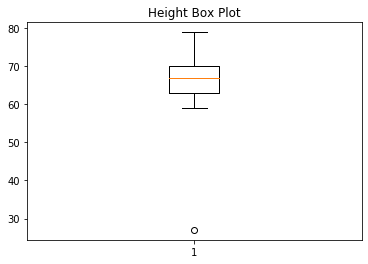

In [32]:
fig1, ax1 = plt.subplots()
ax1.set_title('Height Box Plot')
info = ax1.boxplot(patients["height"])

In [33]:
#It is obvious we have an outlier which represents an error
outliers =[fliers.get_ydata() for fliers in info['fliers']]
outliers

[array([27])]

In [34]:
patients[patients["height"]==27]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [35]:
#using bmi we can replace the incorrect value
np.sqrt(703 * 192.3 / 26.1) #72 seems a more reasonable, probably 72 was mistyped as 27

71.96926227663917

In [36]:
patients.loc[patients["height"]==27,"height"] = 72

In [37]:
patients[patients["patient_id"]==5]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,72,26.1


### Weight column fix

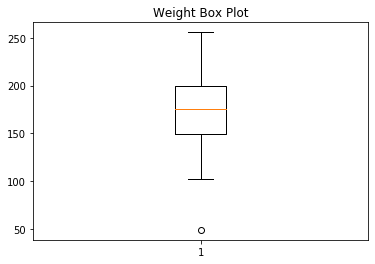

In [38]:
fig1, ax1 = plt.subplots()
ax1.set_title('Weight Box Plot')
info = ax1.boxplot(patients["weight"])

In [39]:
#It is obvious we have an outlier which represents an error
outliers =[fliers.get_ydata() for fliers in info['fliers']]
outliers

[array([48.8])]

In [40]:
patients[patients["weight"]==48.8]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691.0,United States,330-202-2145CamillaZaitseva@superrito.com,11/26/1938,48.8,63,19.1


In [41]:
(48.8/(63**2))*703 

8.643587805492567

That error is due to the fact that this weight is in kg instead of lbs (exercise information)

In [42]:
patients.loc[patients["weight"]==48.8,"weight"] = 48.8*2.20462

In [43]:
patients[patients["patient_id"]==211]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691.0,United States,330-202-2145CamillaZaitseva@superrito.com,11/26/1938,107.585456,63,19.1


In [44]:
(107.52/(63**2))*703 #bmi is now the same as the one in the table

19.044232804232802

In [45]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null object
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null object
zip_code        503 non-null object
country         491 non-null object
contact         491 non-null object
birthdate       503 non-null object
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 55.1+ KB


In [46]:
#We can check the bmi column for possible errors
(patients["weight"]/(patients["height"]*patients["height"])*703 == patients["bmi"]).sum()
#there are no discrepancies between the the bmi in the dataset and the one calculated

0

### State names either appear with either their full name or abbrevation

In [47]:
patients["state"].unique()

array(['California', 'Illinois', 'Nebraska', 'NJ', 'AL', 'Florida', 'NV',
       'CA', 'MO', 'New York', 'MI', 'TN', 'VA', 'OK', 'GA', 'MT', 'MA',
       'NY', 'NM', 'IL', 'LA', 'PA', 'CO', 'ME', 'WI', 'SD', 'MN', 'FL',
       'WY', 'OH', 'IA', 'NC', 'IN', 'CT', 'KY', 'DE', 'MD', 'AZ', 'TX',
       'NE', 'AK', 'ND', 'KS', 'MS', 'WA', 'SC', 'WV', 'RI', 'NH', 'OR',
       nan, 'VT', 'ID', 'DC', 'AR'], dtype=object)

In [48]:
# Mapping from full state name to abbreviation
state_abbrev = {'California': 'CA',
                'New York': 'NY',
                'Illinois': 'IL',
                'Florida': 'FL',
                'Nebraska': 'NE'}
patients["state"] = patients["state"].replace(state_abbrev)
patients["state"].unique()

array(['CA', 'IL', 'NE', 'NJ', 'AL', 'FL', 'NV', 'MO', 'NY', 'MI', 'TN',
       'VA', 'OK', 'GA', 'MT', 'MA', 'NM', 'LA', 'PA', 'CO', 'ME', 'WI',
       'SD', 'MN', 'WY', 'OH', 'IA', 'NC', 'IN', 'CT', 'KY', 'DE', 'MD',
       'AZ', 'TX', 'AK', 'ND', 'KS', 'MS', 'WA', 'SC', 'WV', 'RI', 'NH',
       'OR', nan, 'VT', 'ID', 'DC', 'AR'], dtype=object)

### There are columns of patients that are missing details, such as country and state but they still contain important information, thus they cannot be dropped

In [49]:
patients.isna().sum(axis=0) #these values cannot be recovered

patient_id       0
assigned_sex     0
given_name       0
surname          0
address         12
city            12
state           12
zip_code         0
country         12
contact         12
birthdate        0
weight           0
height           0
bmi              0
dtype: int64

In [50]:
patients[patients.isnull().any(axis=1)]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,Unknown,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,Unknown,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,Unknown,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,Unknown,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,Unknown,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,Unknown,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,Unknown,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,Unknown,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,Unknown,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,Unknown,NaN,NaN,12/16/1962,124.3,69,18.4


In [51]:
#we will replace these nan values with Unknown
for col in ["address","city","state","country","contact"]:   
    patients[col] = patients[col].replace(np.nan,"Unknown")

In [52]:
patients[patients.isnull().any(axis=1)]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi


In [53]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,NE,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,72,26.1


### Contact column fix

In [54]:
patients['phone_number'] = patients.contact.str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})', expand=True)

# [a-zA-Z] to signify emails in this dataset all start and end with letters
patients['email'] = patients.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z])', expand=True)

# Note: axis=1 denotes that we are referring to a column, not a row
patients = patients.drop('contact', axis=1)

In [55]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390.0,United States,7/10/1976,121.7,66,19.6,951-719-9170,ZoeWellish@superrito.com
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812.0,United States,4/3/1967,118.8,66,19.2,+1 (217) 569-3204,PamelaSHill@cuvox.de
2,3,male,Jae,Debord,1493 Poling Farm Road,York,NE,68467.0,United States,2/19/1980,177.8,71,24.8,402-363-6804,JaeMDebord@gustr.com
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,7/26/1951,220.9,70,31.7,+1 (732) 636-8246,PhanBaLiem@jourrapide.com
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,2/18/1928,192.3,72,26.1,334-515-7487,TimNeudorf@cuvox.de


In [56]:
mask = patients["phone_number"].str[:2]=="+1" #we remove the +1 from all numbers
patients.loc[mask,"phone_number"] = patients.loc[mask,"phone_number"].str[2:]

In [57]:
patients["phone_number"] = "1" + patients["phone_number"]

In [58]:
for char in [" ","(",")","-"]:    
    patients["phone_number"] = patients["phone_number"].str.replace(char,"" )
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390.0,United States,7/10/1976,121.7,66,19.6,19517199170,ZoeWellish@superrito.com
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812.0,United States,4/3/1967,118.8,66,19.2,12175693204,PamelaSHill@cuvox.de
2,3,male,Jae,Debord,1493 Poling Farm Road,York,NE,68467.0,United States,2/19/1980,177.8,71,24.8,14023636804,JaeMDebord@gustr.com
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,7/26/1951,220.9,70,31.7,17326368246,PhanBaLiem@jourrapide.com
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,2/18/1928,192.3,72,26.1,13345157487,TimNeudorf@cuvox.de


### Remove duplicate entries in patients

In [59]:
patients.duplicated().sum()#no of duplicate rows

0

In [60]:
patients.loc[:,["given_name","surname"]].duplicated().sum() #duplicate nanes

5

In [61]:
mask = patients.loc[:,["given_name","surname"]].duplicated()
patients[mask]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,1/1/1975,180.0,72,24.4,11234567890,johndoe@email.com
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,1/1/1975,180.0,72,24.4,11234567890,johndoe@email.com
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,1/1/1975,180.0,72,24.4,11234567890,johndoe@email.com
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,1/1/1975,180.0,72,24.4,11234567890,johndoe@email.com
277,278,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,1/1/1975,180.0,72,24.4,11234567890,johndoe@email.com


In [62]:
patients = patients.drop_duplicates(subset=["given_name","surname"])
patients.shape

(498, 15)

# Auralin vs Novadra

In [71]:
combined.head(1)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change_new,insulin_brand,initial_dosage,final_dosage,adverse_reaction
0,veronika,jindrová,7.63,7.2,0.43,auralin,41.0,48.0,None


In [72]:
#side effects
combined.groupby(["insulin_brand"]).adverse_reaction.value_counts()

insulin_brand  adverse_reaction         
auralin        None                         160
               hypoglycemia                   9
               throat irritation              2
               cough                          1
               headache                       1
               nausea                         1
novodra        None                         155
               hypoglycemia                  10
               injection site discomfort      6
               headache                       2
               cough                          1
               nausea                         1
Name: adverse_reaction, dtype: int64

In [74]:
#dosage change
combined["dosage_change"] = combined["final_dosage"] - combined["initial_dosage"]
combined.groupby(["insulin_brand"]).dosage_change.mean()
# auralin needs 8.33units more insulin

insulin_brand
auralin    8.333333
novodra   -0.377143
Name: dosage_change, dtype: float32

In [75]:
#hba1c change
combined.groupby(["insulin_brand"]).hba1c_change_new.mean() #more is better

insulin_brand
auralin    0.386954
novodra    0.404914
Name: hba1c_change_new, dtype: float64